In [1]:
# Reading Data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Building CNN Model & Pretraining Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout

# Downlaod Model
import pickle

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data = ImageDataGenerator(rescale = 1/255.0,validation_split=0.2) # here validation split means test split
trainData = data.flow_from_directory(directory ="plant diseases training",
                                      target_size=(100,100),class_mode='categorical', batch_size=32,shuffle=True, subset = "training")
testData = data.flow_from_directory(directory = "plant diseases training",
                                     target_size=(100,100),class_mode='categorical', batch_size=32,shuffle=True, subset = "validation")

Found 4132 images belonging to 11 classes.
Found 1031 images belonging to 11 classes.


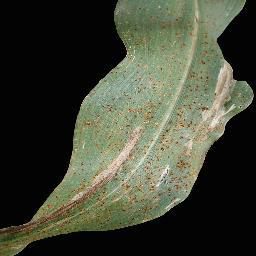

In [12]:
from PIL import Image
image1 = Image.open("C:\\Users\\abc\\Downloads\\plant diseases training\\Corn_(maize)___Common_rust_\\RS_Rust 1564_flipLR.JPG")

image1


## Building CNN Model

In [3]:

model = k.models.Sequential()

model.add(k.layers.Conv2D(16, (5, 5), activation="relu", input_shape=(100, 100, 3)))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(32, (4, 4), activation="relu"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.AveragePooling2D((2, 2)))


model.add(k.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(128, (2, 2), activation="relu"))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Flatten())

model.add(k.layers.Dense(256, activation="relu"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(32, activation="relu"))
model.add(k.layers.Dropout(0.2))

model.add(k.layers.Dense(11, activation="softmax"))
## model compile
model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 16)        1216      
                                                                 
 average_pooling2d (Average  (None, 48, 48, 16)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        8224      
                                                                 
 average_pooling2d_1 (Avera  (None, 22, 22, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 average_pooling2d_2 (Avera  (None, 10, 10, 64)        0

In [4]:
history = model.fit(trainData, epochs=50, validation_data=testData)

Epoch 1/50
130/130 [==============================] - 20s 145ms/step - loss: 2.1664 - accuracy: 0.2212 - val_loss: 1.7832 - val_accuracy: 0.4142
Epoch 2/50
130/130 [==============================] - 18s 137ms/step - loss: 1.7202 - accuracy: 0.3863 - val_loss: 1.4121 - val_accuracy: 0.4985
Epoch 3/50
130/130 [==============================] - 18s 140ms/step - loss: 1.3884 - accuracy: 0.5174 - val_loss: 1.1263 - val_accuracy: 0.6091
Epoch 4/50
130/130 [==============================] - 19s 142ms/step - loss: 1.1371 - accuracy: 0.6065 - val_loss: 1.0435 - val_accuracy: 0.6382
Epoch 5/50
130/130 [==============================] - 18s 135ms/step - loss: 0.9419 - accuracy: 0.6745 - val_loss: 0.9863 - val_accuracy: 0.6683
Epoch 6/50
130/130 [==============================] - 18s 136ms/step - loss: 0.8487 - accuracy: 0.7120 - val_loss: 0.7262 - val_accuracy: 0.7565
Epoch 7/50
130/130 [==============================] - 18s 135ms/step - loss: 0.6920 - accuracy: 0.7614 - val_loss: 0.6678 - val_ac

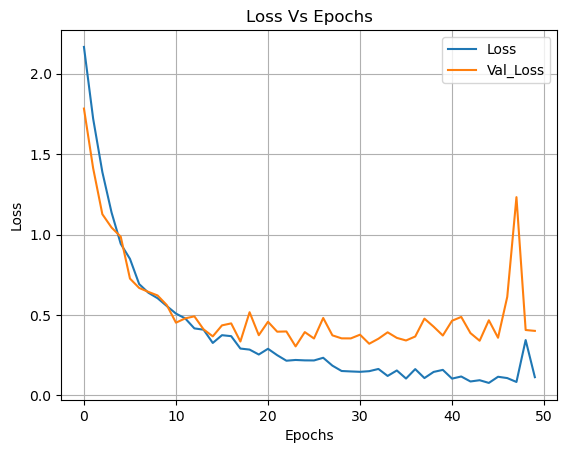

In [5]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

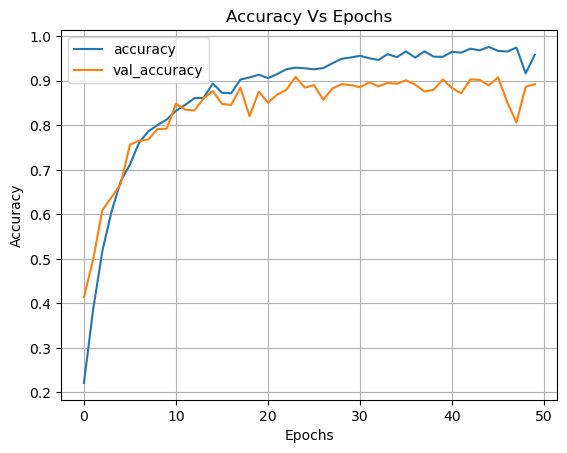

In [6]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [14]:
y_test = model.evaluate(testData)

print(f"The Accuracy Testing Data is ==> {accuracy} %")
print(f"The loss Testing Data is ==> {loss}")

33/33 [==============================] - 2s 49ms/step - loss: 0.4010 - accuracy: 0.8923
The Accuracy Testing Data is ==> 0.8923375606536865 %
The loss Testing Data is ==> 0.4009629786014557


In [13]:
y_pred=model.predict(testData)

33/33 [==============================] - 2s 47ms/step


In [15]:

y_pred

array([[1.1100578e-12, 9.6030461e-10, 6.4866818e-08, ..., 7.9128933e-11,
        1.0602798e-08, 1.3566727e-11],
       [9.9999988e-01, 1.5248915e-10, 2.1895063e-15, ..., 9.4019292e-08,
        5.9743250e-31, 8.8512728e-22],
       [8.1977411e-30, 1.1121754e-25, 2.7456181e-29, ..., 3.2495065e-18,
        9.9999976e-01, 4.4444506e-24],
       ...,
       [9.4805497e-16, 1.0877996e-17, 8.6207449e-14, ..., 1.9333770e-06,
        9.2868797e-09, 2.6700948e-09],
       [1.0000000e+00, 5.1064301e-23, 3.3522163e-22, ..., 4.7799496e-23,
        0.0000000e+00, 0.0000000e+00],
       [1.8943677e-12, 2.7542780e-18, 1.0000000e+00, ..., 1.9033432e-15,
        2.7725781e-33, 5.3969635e-23]], dtype=float32)

In [16]:
import numpy as np


y_pred = np.argmax(y_pred, axis=1)
y_pred

array([5, 0, 9, ..., 7, 0, 2], dtype=int64)

In [19]:
test_labels=testData.labels
test_labels

array([ 0,  0,  0, ..., 10, 10, 10])

###  Prediction on testing data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Text(0.5, 1.0, 'The Real Prediction is TomatoYellowCurlVirus5.JPG \n The model Prediction is [9]')

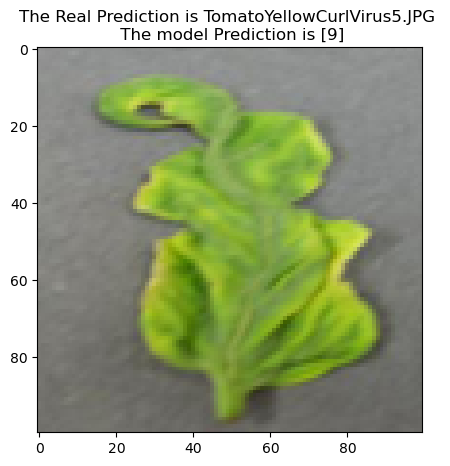

In [177]:
path_test = r"C:\Users\abc\Downloads\python\disease leaf\test\test"
image_testing = []
label_testing = []
for img in os.listdir(path_test):
    image = path_test + "\\" + img
    image = Image.open(image)
    new_image = image.resize((100, 100))
    image_testing.append(new_image)
    label_testing.append(img)

# image_testing = np.array(image_testing)
# label_testing = np.array(label_testing)

plt.figure(figsize=(5,5))
# for i in range(25):
#     plt.subplot(13, 2, i + 1)
#     plt.xticks([])
#     plt.yticks([])
new_image = np.resize(image_testing[i], [1,100, 100, 3])
prediction = model.predict(new_image)
# prediction = prediction[0]
print(prediction)
plt.imshow(image_testing[i])
plt.title(f"The Real Prediction is {label_testing[i]} \n The model Prediction is {[np.argmax(prediction)]}")

In [160]:
len(image_testing)

26